In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

df = pd.read_csv('ev_fuel_stations_5.18.2023.csv')

df.drop_duplicates(inplace=True)

df.dropna(subset=['Latitude', 'Longitude', 'EV Network'])

# create map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
charging_map = folium.Map(location=map_center, zoom_start=6)

marker_cluster = MarkerCluster().add_to(charging_map)

for index, row in df.iterrows():
    marker_color = 'red' if row['EV Network'] == 'Electrify America' else 'blue'
    popup_text = f"Station Name: {row['Station Name']}<br>EV Network: {row['EV Network']}"

    folium.Marker([row['Latitude'], row['Longitude']], popup=folium.Popup(popup_text, max_width=300), icon=folium.Icon(color=marker_color)).add_to(marker_cluster)

legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 160px; height: 90px;
     background-color: white; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; Electrify America &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Other Networks &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i>
      </div>
     '''
charging_map.get_root().html.add_child(folium.Element(legend_html))

charging_map.save('charging_stations_map.html')

<ipython-input-1-038b6cfda334>:6: DtypeWarning: Columns (3,6,20,31,45,46,54,63,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ev_fuel_stations_5.18.2023 2.csv')


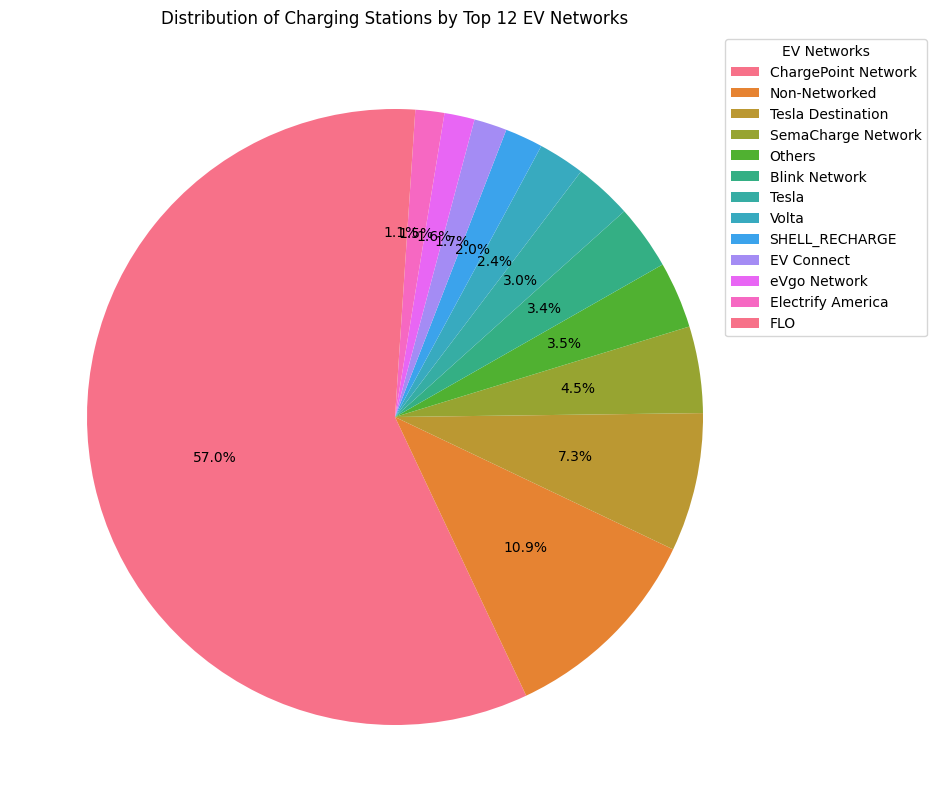

In [2]:
import seaborn as sns

top_networks = df['EV Network'].value_counts().nlargest(12).index
df['EV Network'] = df['EV Network'].apply(lambda x: x if x in top_networks else 'Others')

colors = sns.color_palette('husl', n_colors=len(top_networks))

plt.figure(figsize=(10, 10))
plt.pie(df['EV Network'].value_counts(), labels=None, autopct='%1.1f%%', startangle=90, colors=colors)

legend_labels = [network if network in top_networks else 'Others' for network in df['EV Network'].value_counts().index]
plt.legend(legend_labels, title='EV Networks', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Distribution of Charging Stations by Top 12 EV Networks')
plt.show()


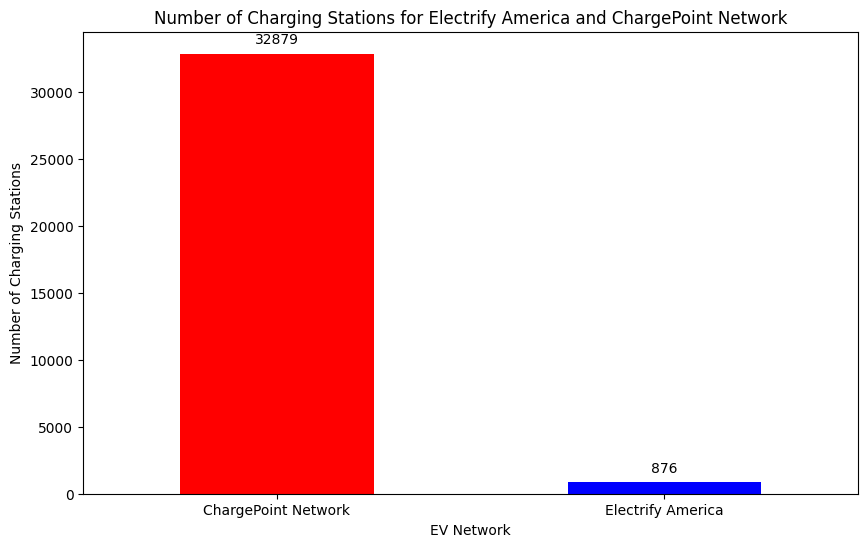

In [ ]:
# bar chart between Electrify America and ChargePoint Network
selected_networks = ['Electrify America', 'ChargePoint Network']
filtered_df = df[df['EV Network'].isin(selected_networks)]

plt.figure(figsize=(10, 6))
ax = filtered_df['EV Network'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Number of Charging Stations for Electrify America and ChargePoint Network')
plt.xlabel('EV Network')
plt.ylabel('Number of Charging Stations')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=0)
plt.show()

<ipython-input-17-88410c4f0c8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrify_america_df['State'] = electrify_america_df['State'].apply(lambda x: x if x in top_states else 'Others')


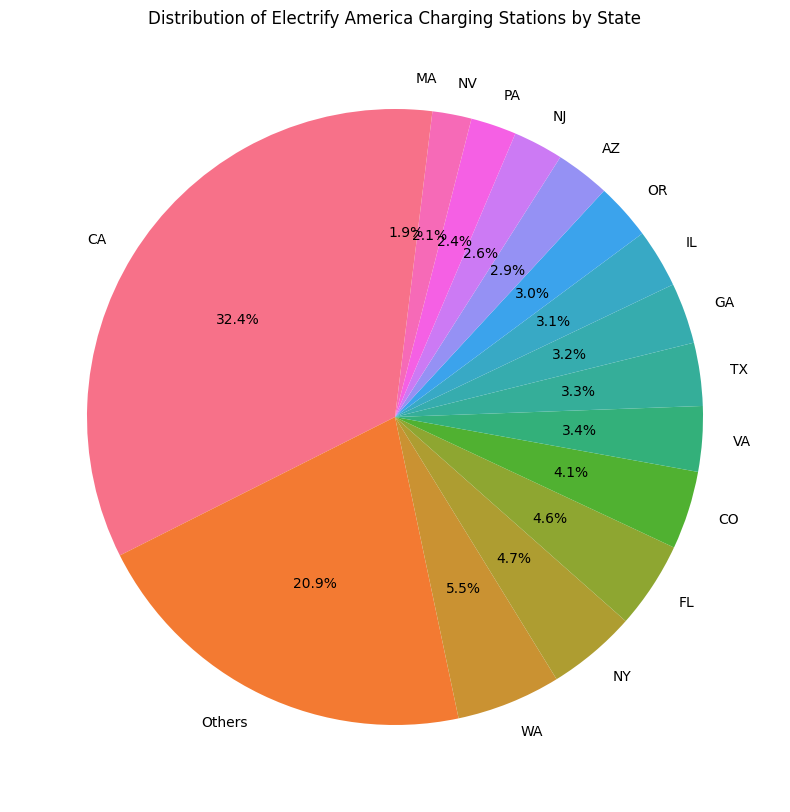

In [ ]:
# Pie Chart for Electrify America Charging Stations by State

df.dropna(subset=['State'])
electrify_america_df = df[df['EV Network'] == 'Electrify America']

top_states = electrify_america_df['State'].value_counts().nlargest(15).index
electrify_america_df['State'] = electrify_america_df['State'].apply(lambda x: x if x in top_states else 'Others')

colors = sns.color_palette('husl', n_colors=len(top_states))

plt.figure(figsize=(10, 10))
pie = electrify_america_df['State'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Distribution of Electrify America Charging Stations by State')
plt.ylabel('')
plt.show()
